In [308]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [309]:
data_s = pd.read_csv('framingham.csv')
data_s.isnull().sum()

data = data_s.copy()
data['education'] = data['education'].fillna(data['education'].mode()[0])
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mode()[0])
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])
data['totChol'] = data['totChol'].fillna(data['totChol'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())
data.dropna(subset=['heartRate'], inplace=True)
data.dropna(subset=['glucose'], inplace=True)

data.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [310]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000
mean,0.442453,49.640166,1.952455,0.490517,8.917641,0.029618,0.006235,0.312549,0.027280,237.005252,132.439465,82.930891,25.809485,75.733437,81.964406,0.154066
std,0.496742,8.594204,1.020616,0.499975,11.895868,0.169553,0.078728,0.463592,0.162919,44.717645,22.126863,11.970290,4.058252,11.929546,23.962669,0.361059
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [311]:
X = data.drop('TenYearCHD', axis=1) # Features
y = data['TenYearCHD'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [312]:
# --- Sınıf 0'ı (Çoğunluk Sınıfı) Eksik Örnekleme (Undersampling) ---

# 1. Eğitim setindeki sınıfların indekslerini belirliyoruz
minority_class_indices = np.where(y_train == 1)[0]
majority_class_indices = np.where(y_train == 0)[0]

# 2. Azınlık sınıfındaki (Class 1) örnek sayısını belirliyoruz.
# Bu, eksik örneklemeden sonra her sınıfta olmasını istediğimiz örnek sayısıdır.
num_minority = len(minority_class_indices)
num_majority = len(majority_class_indices)

print(f"Undersampling öncesi Eğitim Seti Boyutu: {len(X_train)}")
print(f"Undersampling öncesi Azınlık Sınıfı (Class 1) Örnek Sayısı: {num_minority}")
print(f"Undersampling öncesi Çoğunluk Sınıfı (Class 0) Örnek Sayısı: {num_majority}")

# 3. Çoğunluk sınıfından (Class 0) azınlık sınıfı kadar (veya biraz daha fazla/az, isteğe bağlı)
# rastgele örnek seçiyoruz. Burada tam olarak azınlık sınıfı sayısı kadar alacağız.
num_samples_to_keep_from_majority = num_minority # veya farklı bir sayı belirleyebilirsiniz

# 4. Çoğunluk sınıfı indekslerinden rastgele örneklem yapıyoruz (yerine koymadan)
# 'replace=False' önemlidir, aynı örneği birden fazla kez seçmek istemiyoruz
undersampled_majority_indices = np.random.choice(majority_class_indices, size=num_samples_to_keep_from_majority, replace=False)

# 5. Azınlık sınıfının tüm örnekleri ve eksik örneklenmiş çoğunluk sınıfının örneklerinin indekslerini birleştiriyoruz
balanced_indices = np.concatenate((minority_class_indices, undersampled_majority_indices))

# 6. Yeni, dengelenmiş eğitim setini oluşturmak için bu indeksleri kullanıyoruz
X_train_undersampled = X_train[balanced_indices]
y_train_undersampled = y_train[balanced_indices]

# --- İsteğe Bağlı: Dengelenmiş eğitim verisini karıştırma ---
# Veriyi karıştırdıktan sonra modelin öğrenme düzenini iyileştirmek için iyi bir yöntemdir
shuffle_indices = np.random.permutation(len(X_train_undersampled))
X_train_undersampled = X_train_undersampled[shuffle_indices]
y_train_undersampled = y_train_undersampled[shuffle_indices]

# --- Artık X_train_undersampled ve y_train_undersampled'ı eğitim için kullanın ---
X_train = X_train_undersampled
y_train = y_train_undersampled

print(f"\nUndersampling sonrası Eğitim Seti Boyutu: {len(X_train)}")
print(f"Undersampling sonrası Azınlık Sınıfı (Class 1) Örnek Sayısı: {np.sum(y_train == 1)}")
print(f"Undersampling sonrası Çoğunluk Sınıfı (Class 0) Örnek Sayısı: {np.sum(y_train == 0)}")


Undersampling öncesi Eğitim Seti Boyutu: 3079
Undersampling öncesi Azınlık Sınıfı (Class 1) Örnek Sayısı: 474
Undersampling öncesi Çoğunluk Sınıfı (Class 0) Örnek Sayısı: 2605

Undersampling sonrası Eğitim Seti Boyutu: 948
Undersampling sonrası Azınlık Sınıfı (Class 1) Örnek Sayısı: 474
Undersampling sonrası Çoğunluk Sınıfı (Class 0) Örnek Sayısı: 474


In [313]:
theta = np.random.rand(X_train.shape[1])
from scipy.special import expit
# --- Helper Functions ---

def sigmoid(z):
  """Calculates the sigmoid function."""
  return expit(z)

def predict_probabilities(X, theta):
  """
  Calculates the predicted probabilities (pi in your formula).
  This is the P(y=1|X;theta).
  """
  linear_combination = np.dot(X, theta) # This is X * theta
  return sigmoid(linear_combination)

In [314]:
def calculate_gradient(X, y, theta):
  """
  Calculates the gradient of the binary cross-entropy loss.
  This implements the formula what we had in our lecture notes: X^T * (pi - y)
  """
  m = len(X)
  # 1. Calculate the predicted probabilities (pi)
  pi = predict_probabilities(X, theta)

  # 2. Calculate the difference between predictions and true labels (pi - y)
  error = pi - y

  # 3. Calculate the gradient
  # np.dot(X.T, error) is the matrix-vector product X^T * (pi - y)
  gradient = 1/m*np.dot(X.T, error)

  return gradient



Final optimized parameters after 100 iterations: [ 1.08156035  7.60463513 -0.12610845  0.12294028  5.10388009  1.04415977
  0.63990675  1.32319818  0.70434421  6.59106743 14.30187273  3.03551274
  0.02143597 -5.73926879  6.25121503]


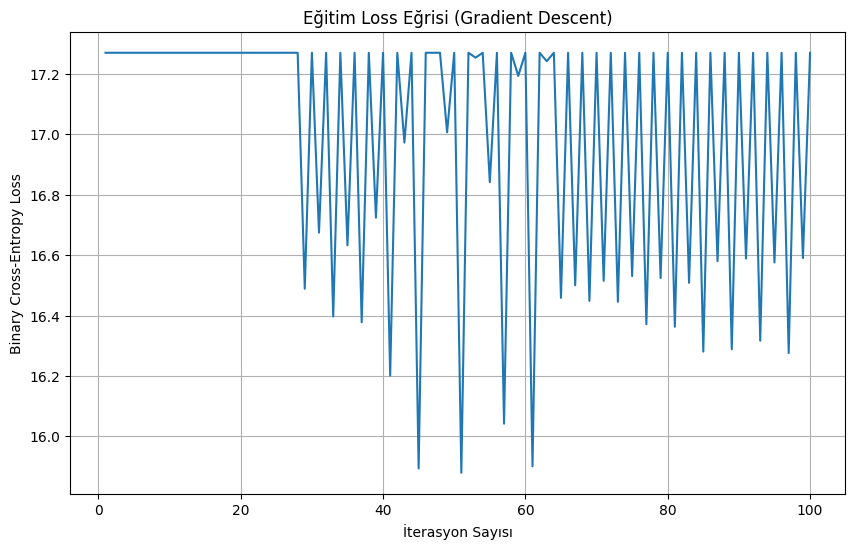

In [315]:
# --- A simplified training loop with Loss Tracking ---
num_iterations = 100 # Örneğin 1000 iterasyon
learning_rate = 0.1

# Loss değerlerini saklamak için boş bir liste oluşturalım
loss_history = []

# theta'yı eğitim setine göre yeniden başlat
theta = np.random.rand(X_train.shape[1])

for i in range(num_iterations):
    # Calculate the gradient
    gradient = calculate_gradient(X_train, y_train, theta)

    # Update the parameters
    theta = theta - learning_rate * gradient

    # Calculate the loss at the current iteration and append to the list
    # Negatif log-likelihood (veya binary cross-entropy) loss'u hesaplayalım
    pi_current = predict_probabilities(X_train, theta)
    # Sayısal kararlılık için epsilon ekle
    epsilon = 1e-15
    current_loss = -np.mean(y_train * np.log(pi_current + epsilon) + (1 - y_train) * np.log(1 - pi_current + epsilon))
    loss_history.append(current_loss)

    # İsteğe bağlı olarak belirli aralıklarla loss'u yazdırabilirsiniz
    # if (i+1) % 100 == 0:
    #     print(f"Iteration {i+1}: Loss = {current_loss:.4f}")

print(f"\nFinal optimized parameters after {num_iterations} iterations: {theta}")
# Final predictions on training set (optional)
# final_predictions = predict_probabilities(X_train, theta)
# print(f"Final predictions with optimized parameters: {final_predictions}")

# Loss - Epoch/Iteration eğrisini çizelim
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), loss_history)
plt.xlabel('İterasyon Sayısı')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Eğitim Loss Eğrisi (Gradient Descent)')
plt.grid(True)


Starting IRLS with 15 max iterations...

Iteration  1: Change in theta = 1.191404, Loss = 0.6931
Iteration  2: Change in theta = 0.163380, Loss = 0.6229
Iteration  3: Change in theta = 0.007632, Loss = 0.6220
Iteration  4: Change in theta = 0.000016, Loss = 0.6220
Iteration  5: Change in theta = 0.000000, Loss = 0.6220

Convergence reached.


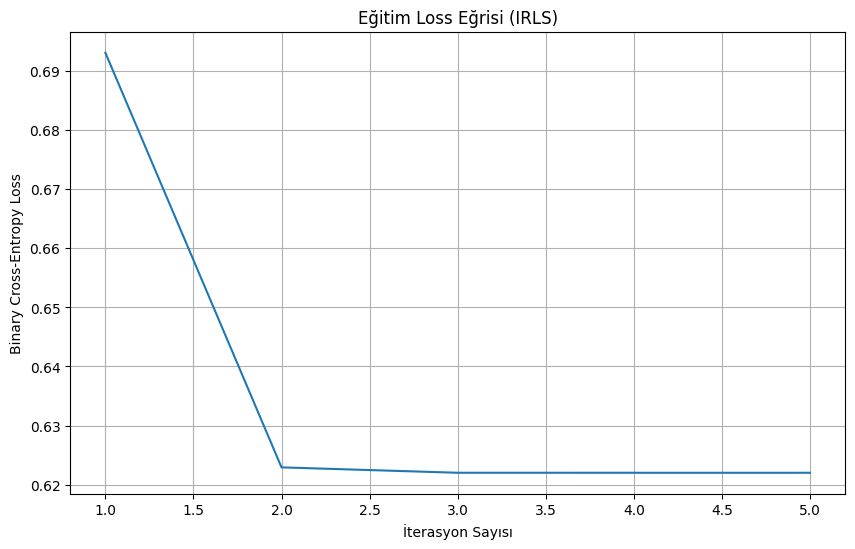

In [316]:
# Let's use Heissian (Iterative Reweighted Least Squares)

def IRLS_logistic_regression_with_loss(X, y, max_iterations=15, tol=1e-5):
    """
    Performs logistic regression using Iterative Reweighted Least Squares (IRLS)
    and tracks the loss at each iteration.

    Args:
        X (np.ndarray): The feature matrix, including a bias column. Shape (m, n).
        y (np.ndarray): The true binary labels (0 or 1). Shape (m,).
        max_iterations (int): The maximum number of iterations to perform.
        tol (float): The tolerance for convergence. The algorithm stops when the
                     change in parameters is less than this value.

    Returns:
        tuple: A tuple containing:
            - np.ndarray: The optimized model parameters (theta).
            - list: A list of loss values at each iteration.
    """

    # Get number of samples (m) and features (n)
    m, n = X.shape

    # 1. Initialize parameters (theta, or 'Q' in your notes)
    # Start with a vector of zeros.
    theta = np.zeros(n)

    # Loss değerlerini saklamak için boş bir liste oluşturalım
    loss_history_irls = []

    print(f"Starting IRLS with {max_iterations} max iterations...\n")

    # 2. Start the iterative process
    for k in range(max_iterations):
        theta_old = theta.copy() # Store old theta to check for convergence

        # --- Calculate components for the current iteration 'k' ---

        # Calculate the linear combination: eta = X * theta
        eta = np.dot(X, theta)

        # Calculate the predicted probabilities: pi = sigmoid(eta)
        pi = sigmoid(eta)

        # Calculate the loss at the current iteration and append to the list
        # Negatif log-likelihood (veya binary cross-entropy) loss'u hesaplayalım
        epsilon = 1e-15
        current_loss_irls = -np.mean(y * np.log(pi + epsilon) + (1 - y) * np.log(1 - pi + epsilon))
        loss_history_irls.append(current_loss_irls)


        # Calculate the gradient 'g_k' = X^T * (pi - y)
        gradient = np.dot(X.T, pi - y)

        # Calculate the diagonal weight matrix 'S_k'
        # The weights are pi * (1 - pi). We must avoid weights of exactly 0.
        weights = pi * (1 - pi)
        weights[weights == 0] = 1e-10 # Add small epsilon for numerical stability
        S = np.diag(weights)

        # Calculate the Hessian 'H_k' = X^T * S_k * X
        Hessian = X.T @ S @ X

        # --- Perform the Newton update step ---
        # theta_k+1 = theta_k - H_k^-1 * g_k
        # We solve H * delta = g for delta, which is more stable than inverting H
        Hessian_inv_g = np.linalg.solve(Hessian, gradient)
        theta = theta - Hessian_inv_g

        # --- Check for convergence ---
        change = np.linalg.norm(theta - theta_old)
        print(f"Iteration {k+1:2d}: Change in theta = {change:.6f}, Loss = {current_loss_irls:.4f}") # Loss'u da yazdırabiliriz
        if change < tol:
            print("\nConvergence reached.")
            break

    return theta, loss_history_irls


# IRLS modelini eğitim seti üzerinde çalıştır ve loss_history_irls'i al
theta_IRLS, loss_history_irls = IRLS_logistic_regression_with_loss(X_train, y_train)


# Loss - Iteration eğrisini çizelim (IRLS için)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss_history_irls) + 1), loss_history_irls)
plt.xlabel('İterasyon Sayısı')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Eğitim Loss Eğrisi (IRLS)')
plt.grid(True)
plt.show()


In [317]:
theta_IRLS = IRLS_logistic_regression(X_train,y_train)

Starting IRLS with 15 max iterations...

Iteration  1: Change in theta = 1.191404
Iteration  2: Change in theta = 0.163380
Iteration  3: Change in theta = 0.007632
Iteration  4: Change in theta = 0.000016
Iteration  5: Change in theta = 0.000000

Convergence reached.


# --- Testing The Code ---

In [318]:
# 1. Use the trained parameters
# Assuming 'theta' contains the final optimized parameters from either Gradient Descent or IRLS

# 2. Calculate predictions on the test set
# Use the predict_probabilities function defined earlier
test_probabilities = predict_probabilities(X_test, theta)
test_probabilities_IRLS = predict_probabilities(X_test, theta_IRLS)
# 3. Convert probabilities to class labels
# Set a threshold (commonly 0.5)
predicted_classes = (test_probabilities >= 0.5).astype(int)
predicted_classes_IRLS = (test_probabilities_IRLS >= 0.5).astype(int)
# 4. Evaluate performance
# You can use metrics like accuracy, precision, recall, F1-score.
# Let's start with accuracy as a simple example.

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_classes)
accuracy_IRLS = accuracy_score(y_test, predicted_classes_IRLS)
print("\n--- Model Testing Results ---")
print(f"Accuracy on the test set: {accuracy:.4f}")
print(f"Accuracy on the test set IRLS: {accuracy_IRLS:.4f}")
# You can add other metrics as well:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, predicted_classes))
print("\nClassification Report IRLS:")
print(classification_report(y_test, predicted_classes_IRLS))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predicted_classes))
print("\nConfusion Matrix IRLS:")
print(confusion_matrix(y_test, predicted_classes_IRLS))


--- Model Testing Results ---
Accuracy on the test set: 0.1545
Accuracy on the test set IRLS: 0.6558

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       651
           1       0.15      1.00      0.27       119

    accuracy                           0.15       770
   macro avg       0.08      0.50      0.13       770
weighted avg       0.02      0.15      0.04       770


Classification Report IRLS:
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       651
           1       0.25      0.63      0.36       119

    accuracy                           0.66       770
   macro avg       0.58      0.65      0.56       770
weighted avg       0.81      0.66      0.70       770


Confusion Matrix:
[[  0 651]
 [  0 119]]

Confusion Matrix IRLS:
[[430 221]
 [ 44  75]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [319]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

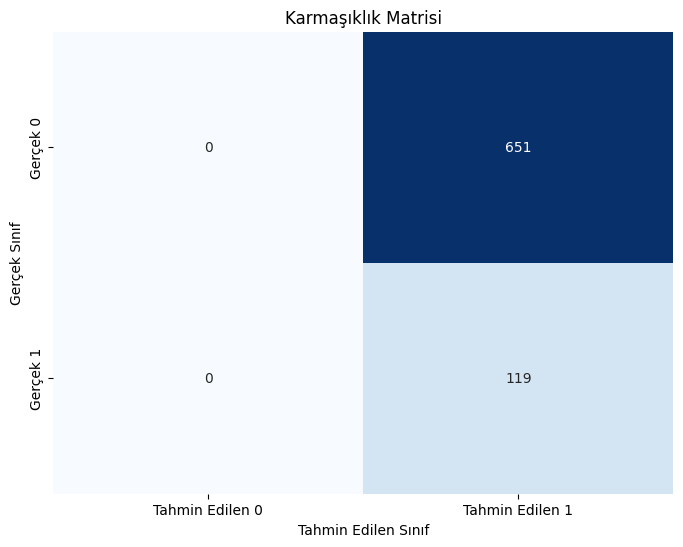

In [320]:

current_predictions = predicted_classes # veya predicted_classes_IRLS

# Karmaşıklık matrisini hesaplayalım
cm = confusion_matrix(y_test, current_predictions)

# Karmaşıklık matrisini görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Tahmin Edilen 0', 'Tahmin Edilen 1'],
            yticklabels=['Gerçek 0', 'Gerçek 1'])
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

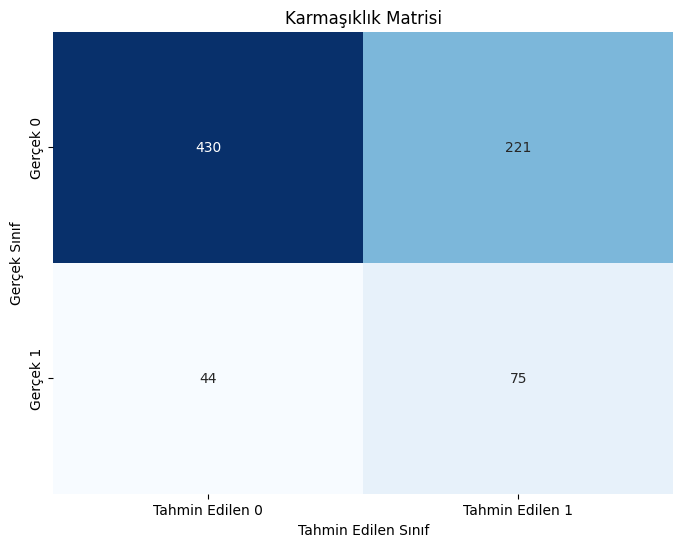

In [321]:
current_predictions = predicted_classes_IRLS # veya predicted_classes_IRLS

# Karmaşıklık matrisini hesaplayalım
cm = confusion_matrix(y_test, current_predictions)

# Karmaşıklık matrisini görselleştirelim
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Tahmin Edilen 0', 'Tahmin Edilen 1'],
            yticklabels=['Gerçek 0', 'Gerçek 1'])
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()